### Homework 6

이번 과제에서는 시장의 장기 기억과 엔트로피 특성에 대해서 실습해 보도록 한다

#### 1. Data Import

2000년 1월 1일부터 2023년 7월 31일까지의 아래의 library를 이용해서 NIKKEI 지수 데이터를 불러오라

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2000-01-01'
end_date = '2023-08-01'

nikkei = yf.download('^N225', start = start_date, end = end_date).iloc[:,:-1]
nikkei

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-04,18937.449219,19187.609375,18937.449219,19002.859375,19002.859375
2000-01-05,19003.509766,19003.509766,18221.820312,18542.550781,18542.550781
2000-01-06,18574.009766,18582.740234,18168.269531,18168.269531,18168.269531
2000-01-07,18194.050781,18285.730469,18068.099609,18193.410156,18193.410156
2000-01-11,18246.099609,18887.560547,18246.099609,18850.919922,18850.919922
...,...,...,...,...,...
2023-07-25,32705.390625,32715.560547,32509.939453,32682.509766,32682.509766
2023-07-26,32704.960938,32724.250000,32488.519531,32668.339844,32668.339844
2023-07-27,32523.689453,32938.589844,32503.689453,32891.160156,32891.160156


#### 2. Fractionally Differentiated Series

**2.1 ADF test**
닫힌 구간 [0,2]까지 0.1구간별로 차분계수 $d$를 검정하여 Augmented Dickey Fuller test 값이 유의수준 5%(신뢰구간 95%)를 통과하는 최소의 차분계수를 구하여라. $d$의 값이 0에 가까울수록 어떤 insight를 얻을 수 있는가?

In [13]:
import AdvancedTimeSeries as ats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(nikkei).dropna()
        df2 = ats.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.2, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.698088,8.472442e-01,1.0,5774.0,-2.862041,1.000000
0.3,-0.555157,8.807962e-01,1.0,4.0,-4.474365,0.903045
0.4,-2.654235,8.229780e-02,1.0,11.0,-3.189369,0.894029
0.5,-2.557857,1.020238e-01,1.0,28.0,-2.971989,0.820135
0.6,-4.106405,9.451827e-04,1.0,74.0,-2.901470,0.212413
0.7,-7.088097,4.483546e-10,1.0,203.0,-2.875885,0.399191
0.8,-13.553655,2.382766e-25,1.0,610.0,-2.866290,0.277425
0.9,-27.560141,0.000000e+00,1.0,1987.0,-2.862996,0.071905
1.0,-54.079114,0.000000e+00,1.0,5773.0,-2.862041,0.028454
1.1,-50.062983,0.000000e+00,1.0,4216.0,-2.862226,0.017788


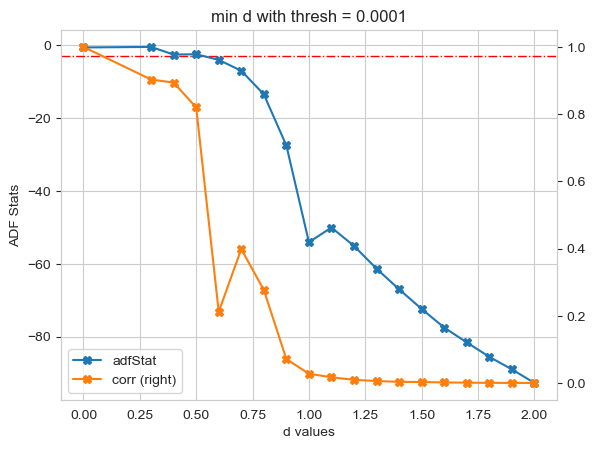

In [14]:
f,ax = plt.subplots()
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats')
display(out)

유의수준 5%이내인 최소의 $d$값은 0.6이다. $d$의 값이 0에 가까울수록 시계열이 최소의 차분만으로 정상성을 가진다는 뜻이므로, 원시계열이 효율적이라는 것을 유추해낼 수 있다. 즉 일본의 금융시장은 차분을 하기 위해 $d=1$까지 할 필요가 없으므로, 효율적인 시장이라 할 수 있다

**2.2 Expanding window Fractional Differentiated Series**

함수 `fracDiff`는 윈도우를 확장하며 실수 차원의 차분 시계열을 추정하는 함수이다. 함수에 대해 적절한 방법으로 plotting하고 histogram을 확인하라

Text(0.5, 1.0, 'Expanding Window Fractional Differentiated Series')

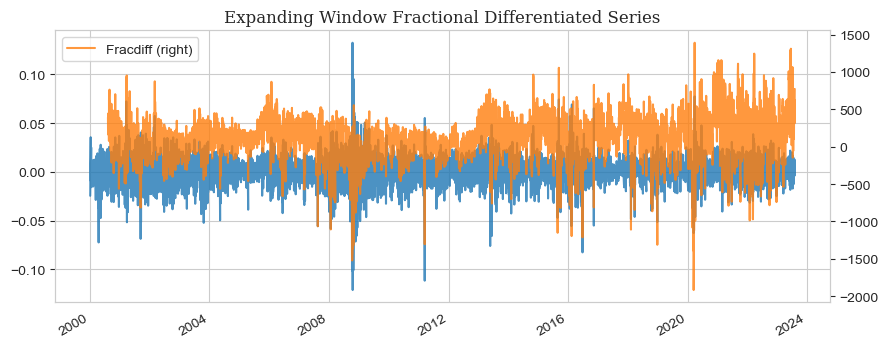

In [16]:
plt.figure(figsize = (10,4))
plt.plot(np.log(nikkei.Close / nikkei.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff(nikkei, 0.6).Close.plot(secondary_y = True, alpha = 0.8, label = 'Fracdiff')
plt.legend()
plt.title('Expanding Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

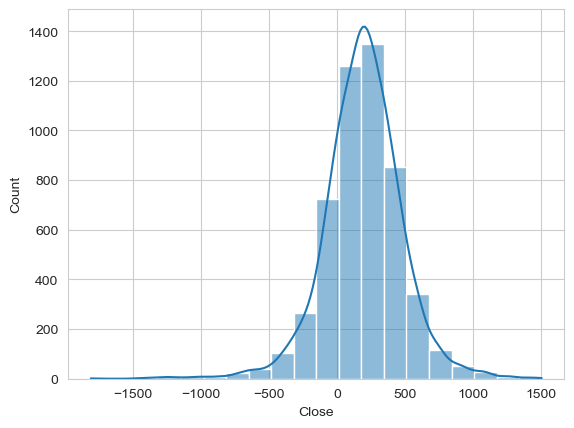

In [19]:
import seaborn as sns
sns.histplot(ats.fracDiff_FFD(nikkei, 0.6).Close, kde = True, bins = 20)

#### 3. Supremum Augmented Dickey-Fuller Test

Nikkei 지수 데이터에 대하여 상한 ADF 검정을 시행하라. 가격 계열은 로그화된 시계열을 사용하며 최소 샘플 기간은 100이고 lag는 1, 선형추세가 있다고 가정한다. SADF검정치에 따라 거품이 붕괴된 기간은 언제인가? 적절한 방법을 통해 시각화하라

In [20]:
sadf = ats.get_bSADF_test_statistics(np.log(nikkei.Close), minSL = 100, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum ADF test (Apple)')

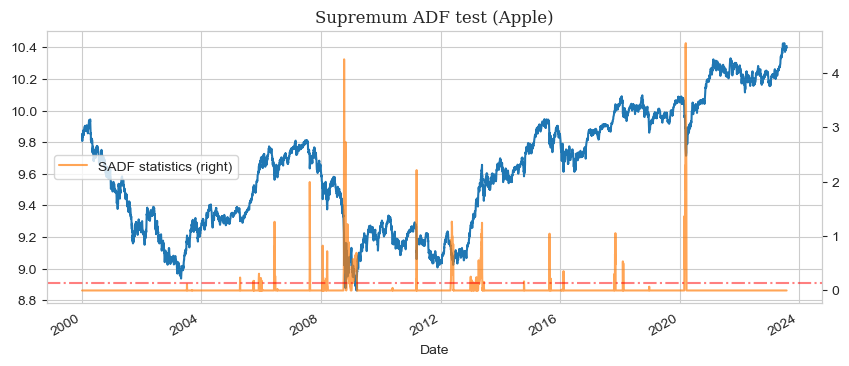

In [21]:
plt.figure(figsize = (10, 4))
plt.plot(np.log(nikkei.Close))
sadf.plot(secondary_y = True, alpha = 0.7, label = 'SADF statistics')
plt.legend(loc = 'center left')
plt.axhline(np.log(nikkei.Close).mean() * (1.65 * np.log(nikkei.Close).std() / np.sqrt(2158)), color = 'r', ls = '-.', alpha = 0.5)
plt.title('Supremum ADF test (Apple)', fontfamily = 'Serif', fontsize = 12)

#### 4. Entropy Features

**2번**에서 추정한 apple 주가의 fracdiff 계열을 가져오고 다음 물음에 답하라

**4.1 Encoding**

전체 Series에 대해 10구간 인코딩을 진행한 뒤, Plug-in 추정량과 Kontoyiannis entropy 추정량을 계산하라. 여기서 window는 100으로 가정한다

In [22]:
ret = ats.fracDiff(nikkei, 0.6).Close
ret_quantile = pd.qcut(ret, q = 10, labels = range(10))
message = ''.join(map(str, ret_quantile.values))

In [23]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.12432541900387228
Konto's Entropy estimation: 2.349210310692825


**4.2 Sigma Encoding**

전체 시리즈에 대해 sigma encoding을 진행한 뒤, 적절한 방법으로 시각화하라. 여기서 sigma는 Series의 표본표준편차 값을 사용한다. encoding된 값에 대해 Plug-in 추정량과 Kontoyiannis entropy 추정량을 계산하라. 무엇을 알 수 있는가?

In [24]:
segments = ats.generate_buckets(series = ret, sigma = ret.std())
ret_sigma = ret.apply(lambda obs: ats.encode_single_obs(obs = obs, segments = segments))
message = ''.join(map(str, ret_sigma.values))

Text(0.5, 1.0, 'Sigma Encoding (Nikkei 225)')

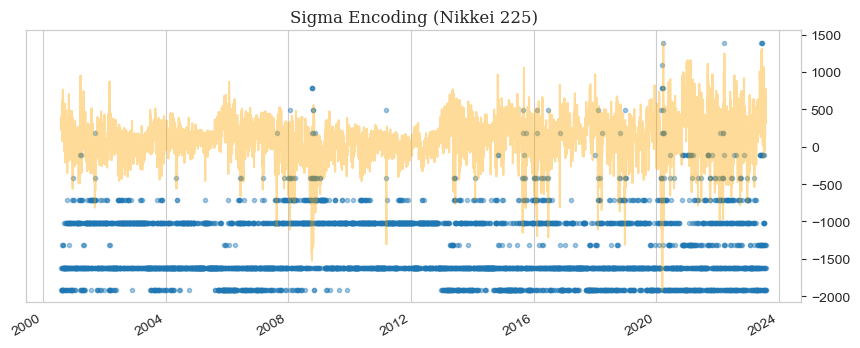

In [26]:
plt.figure(figsize = (10,4))
plt.scatter(ret_sigma.index, ret_sigma, marker = '.', alpha = 0.4)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Sigma Encoding (Nikkei 225)', fontfamily = 'Serif', fontsize = 12)

In [27]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.12432541900387228
Konto's Entropy estimation: 1.4616871190283707


**4.3 Continuous Market Entropy**

아래의 library를 활용하여 연속적인 값을 가정했을 때의 Market Entropy를 추정하라. 추정에는 100기간 Entropy추정량을 사용하도록 한다

In [28]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [29]:
bin = ats.OptimizeBins(len(ret), corr = None)
print('Optimized Bin : ', bin)

Optimized Bin :  26


In [30]:
etp = []
for i in range(100, len(ret)) :
    hX = ss.entropy(np.histogram(ret[i-100:i], bin)[0])
    etp.append(hX)
etp = pd.DataFrame(etp, index = ret.index[100:])
etp.columns = ['Market Entropy']
etp

,Market Entropy
2001-01-05,2.859220
2001-01-09,2.864932
2001-01-10,2.868620
2001-01-11,2.879636
2001-01-12,2.887575
...,...
2023-07-25,2.899454
2023-07-26,2.898020
2023-07-27,2.905407
2023-07-28,2.902299


Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

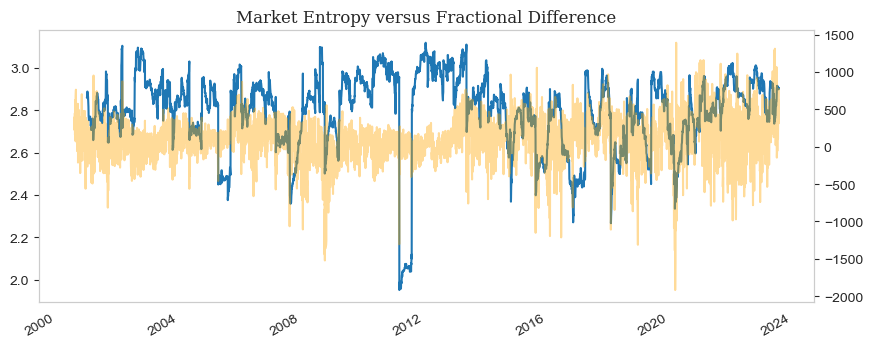

In [31]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

#### 5. Feature Matrix

지금까지 배운 내용을 토대로 Machine Learning model을 구축을 위한 특성 행렬을 제작해 본다

**5.1 Estimates Volatility**

Homework 5에서 사용한 변동성 추정량 중 하나를 사용하여 변동성을 추정하라

In [32]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

In [33]:
becker_parkinson = getSigma(getBeta(nikkei, 1), getGamma(nikkei))
becker_parkinson

Date
2000-01-05    0.031056
2000-01-06    0.016996
2000-01-07    0.015171
2000-01-11    0.027986
2000-01-12    0.013829
                ...   
2023-07-25    0.002813
2023-07-26    0.000676
2023-07-27    0.004629
2023-07-28    0.011719
2023-07-31    0.033789
Length: 5776, dtype: float64

In [34]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import statsmodels.api as sm
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained ** 2

    def untransform_params(self, constrained):
        return constrained ** 0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [35]:
model = LocalLinearTrend(becker_parkinson)
result = model.fit(disp = True)

print(result.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.41435D-01    |proj g|=  4.26055D+00

At iterate    1    f= -1.75755D+00    |proj g|=  1.33756D+01

At iterate    2    f= -1.90362D+00    |proj g|=  1.60459D+01
  ys=-6.945E-02  -gs= 1.237E-01 BFGS update SKIPPED

At iterate    3    f= -1.90711D+00    |proj g|=  1.53861D+01

At iterate    4    f= -2.48118D+00    |proj g|=  2.57168D+01

At iterate    5    f= -2.68602D+00    |proj g|=  4.40302D+01

At iterate    6    f= -2.90477D+00    |proj g|=  5.58655D+01

At iterate    7    f= -2.94310D+00    |proj g|=  6.06027D+01

At iterate    8    f= -3.08565D+00    |proj g|=  1.81097D+02

At iterate    9    f= -3.09090D+00    |proj g|=  2.08649D+02

At iterate   10    f= -3.09753D+00    |proj g|=  2.78084D+02

At iterate   11    f= -3.10587D+00    |proj g|=  2.98530D+02

At iterate   12    f= -3.10594D+00  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     81      2     1     0   2.290D+02  -3.106D+00
  F =  -3.1059359310640735     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5776
Model:               LocalLinearTrend   Log Likelihood               17939.886
Date:                Tue, 29 Aug 2023   AIC                         -35873.772
Time:                        01:38:41   BIC                         -35853.789
Sample:                     


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


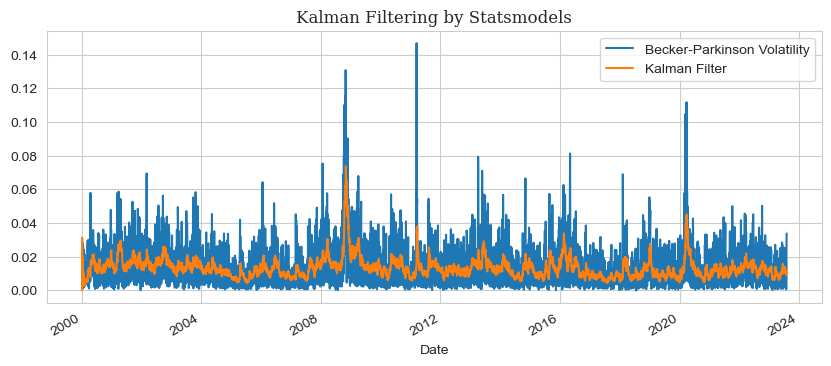

In [36]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Becker-Parkinson Volatility": becker_parkinson,
                      "Kalman Filter": predict.predicted_mean})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtering by Statsmodels", fontfamily = 'Serif', fontsize = 12)
plt.show()

In [37]:
volatility = predict.predicted_mean

**5.2 Moving Average**

특성 행렬에 추가하기 위해 5일 이동평균값과 60일 이동평균 값을 rolling하여 추정하라

In [38]:
ma5 = nikkei.Close.rolling(window = 5, center = False).mean()
ma60 = nikkei.Close.rolling(window = 60, center = False).mean()

**5.3 Feature Matrix**

fractional difference된 가격 계열, SADF 검정값, Entropy feature, 변동성 추정량, 5일 이동평균, 60일 이동평균, label을 포함하는 feature matrix를 제작하라

In [44]:
fracdiff = ats.fracDiff_FFD(nikkei, 0.6).Close

In [53]:
matrix = pd.concat([ret, fracdiff, sadf, etp, volatility, ma5, ma60], axis = 1).dropna()
matrix.columns = ['Log return','Fracdiff','SADF','Entropy','Volatility','MA5','MA60']
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60
2002-05-27,0.000006,191.969740,0.0,2.806072,0.011910,11939.124023,11463.171859
2002-05-28,-0.003368,142.571619,0.0,2.804638,0.011728,11966.108008,11485.888363
2002-05-29,-0.006985,76.884991,0.0,2.798162,0.011699,11944.311914,11506.974528
2002-05-30,-0.007025,43.271631,0.0,2.794474,0.011469,11902.348047,11522.941699
2002-05-31,-0.000538,94.597708,0.0,2.793220,0.011524,11859.832031,11528.166374
...,...,...,...,...,...,...,...
2023-07-25,-0.000564,546.478738,0.0,2.899454,0.011885,32614.850000,31720.917383
2023-07-26,-0.000434,508.178139,0.0,2.898020,0.010868,32569.311719,31791.095052
2023-07-27,0.006798,726.153382,0.0,2.905407,0.009722,32649.439844,31858.340397
2023-07-28,-0.004019,453.849524,0.0,2.902299,0.009147,32740.435937,31918.941243


**5.4 Labeling**

단기 이동평균이 장기 이동평균보타 크면 매수, 작으면 매도하는 신호를 labeling한 pandas.Series를 matrix에 추가하라

In [54]:
matrix['Labels'] = 0
matrix.loc[matrix['MA5'] > matrix['MA60'], 'Labels'] = 1
matrix.loc[matrix['MA5'] < matrix['MA60'], 'Labels'] = -1

In [55]:
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60,Labels
2002-05-27,0.000006,191.969740,0.0,2.806072,0.011910,11939.124023,11463.171859,1
2002-05-28,-0.003368,142.571619,0.0,2.804638,0.011728,11966.108008,11485.888363,1
2002-05-29,-0.006985,76.884991,0.0,2.798162,0.011699,11944.311914,11506.974528,1
2002-05-30,-0.007025,43.271631,0.0,2.794474,0.011469,11902.348047,11522.941699,1
2002-05-31,-0.000538,94.597708,0.0,2.793220,0.011524,11859.832031,11528.166374,1
...,...,...,...,...,...,...,...,...
2023-07-25,-0.000564,546.478738,0.0,2.899454,0.011885,32614.850000,31720.917383,1
2023-07-26,-0.000434,508.178139,0.0,2.898020,0.010868,32569.311719,31791.095052,1
2023-07-27,0.006798,726.153382,0.0,2.905407,0.009722,32649.439844,31858.340397,1
2023-07-28,-0.004019,453.849524,0.0,2.902299,0.009147,32740.435937,31918.941243,1


#### 6. Random Forest

아래의 library를 사용하여 Random Forest classification을 수행하라. test size = 0.2으로 지정하라. Feature Importance도 시각화하라. 자세한 Hyperparameter는 아래를 따른다

- n_estimator : 1000
- criterion : 'entropy'
- bootstrap : True
- n_jobs : 1
- random_state : 42
- class_weight : 'balanced_subsample'
- oob_score : False

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [56]:
X = matrix.iloc[:,:-1]
y = matrix['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, 
                            criterion = "entropy", 
                            bootstrap = True, n_jobs=1, 
                            random_state = 42, 
                            class_weight = 'balanced_subsample', 
                            oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

    no trade       0.85      0.31      0.46       593
       trade       0.70      0.97      0.81       964

    accuracy                           0.72      1557
   macro avg       0.77      0.64      0.63      1557
weighted avg       0.75      0.72      0.67      1557


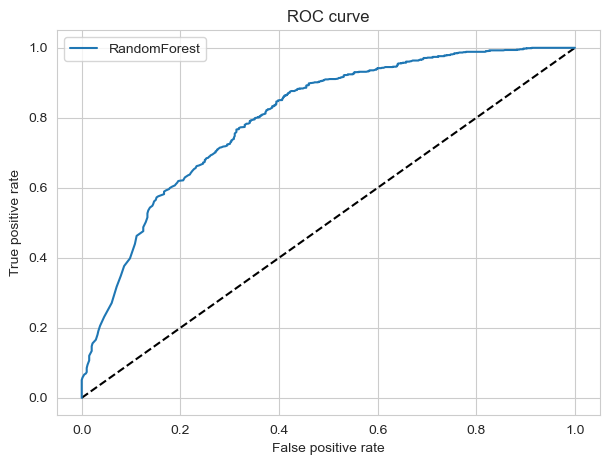

In [60]:
fit = rf.fit(X_train, y_train)
y_pred_rf = fit.predict_proba(X_test)[:, 1]
y_pred = fit.predict(X_test)
fpr_bc, tpr_bc, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bc, tpr_bc, label = 'RandomForest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
plt.show()

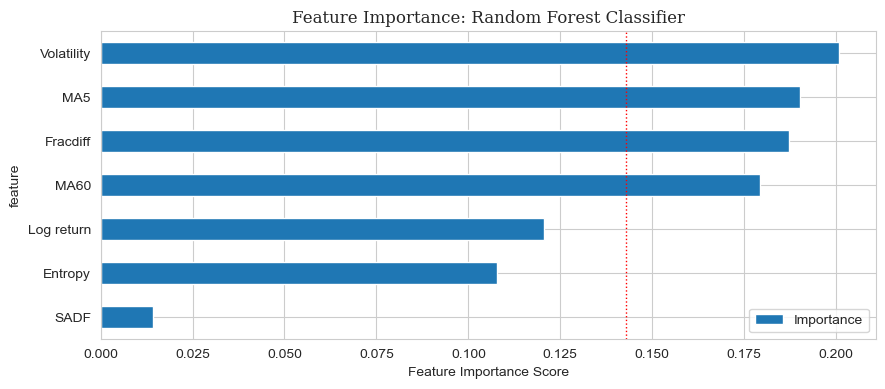

In [63]:
title = 'Feature Importance: Random Forest Classifier'
figsize = (10, 4)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending = False, inplace = True)
feat_imp = feat_imp

feat_imp.sort_values(by = 'Importance', inplace = True)
feat_imp = feat_imp.set_index('feature', drop = True)
feat_imp.plot.barh(figsize = figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.title(title, fontsize = 12, fontfamily = 'Serif')
plt.show()